# Exploring the dataset



In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from kagglehub import KaggleDatasetAdapter
file_path = "countries of the world.csv"
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "fernandol/countries-of-the-world",
  file_path,
)

print("First 5 records:", df.head())

C:\Users\emank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


First 5 records:            Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.) Pop. Density (per sq. mi.) Coastline (coast/area ratio)  \
0          647500                       48,0                         0,00   
1           28748                      124,6                         1,26   
2         2381740                       13,8                         0,04   
3             199                      290,4                        58,29   
4             468                      152,1                         0,00   

  Net migration Infant mortality (per 1000 births)  GDP ($ per capita)  \
0         23,06    

In [2]:
print(df.shape)

(227, 20)


In [3]:
print(df.columns)

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [5]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

# Wrangle

## converting to numeric instead of object when necessary

In [6]:
to_numeric = [
    "Pop. Density (per sq. mi.)",
    "Coastline (coast/area ratio)",
    "Net migration",
    "Infant mortality (per 1000 births)",
    "Literacy (%)",
    "Phones (per 1000)",
    "Arable (%)",
    "Crops (%)",
    "Other (%)",
    "Climate",
    "Birthrate",
    "Deathrate",
    "Agriculture",
    "Industry",
    "Service",
]

for col in to_numeric:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .str.strip()
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

## Dealing with NA values

In [7]:
critical_cols = [
    "GDP ($ per capita)",
    "Literacy (%)",
    "Infant mortality (per 1000 births)",
]

df_clean = df.dropna(subset=critical_cols).copy()

impute_cols = [
    "Phones (per 1000)",
    "Birthrate",
    "Deathrate",
    "Agriculture",
    "Industry",
    "Service",
]

for col in impute_cols:
    df_clean[col] = df_clean.groupby("Region")[col]\
                            .transform(lambda x: x.fillna(x.median()))

print("Original:", df.shape)
print("Cleaned:", df_clean.shape)
df_clean.isna().sum()

Original: (227, 20)
Cleaned: (207, 20)


Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          0
Infant mortality (per 1000 births)     0
GDP ($ per capita)                     0
Literacy (%)                           0
Phones (per 1000)                      0
Arable (%)                             0
Crops (%)                              0
Other (%)                              0
Climate                               20
Birthrate                              0
Deathrate                              0
Agriculture                            0
Industry                               0
Service                                0
dtype: int64

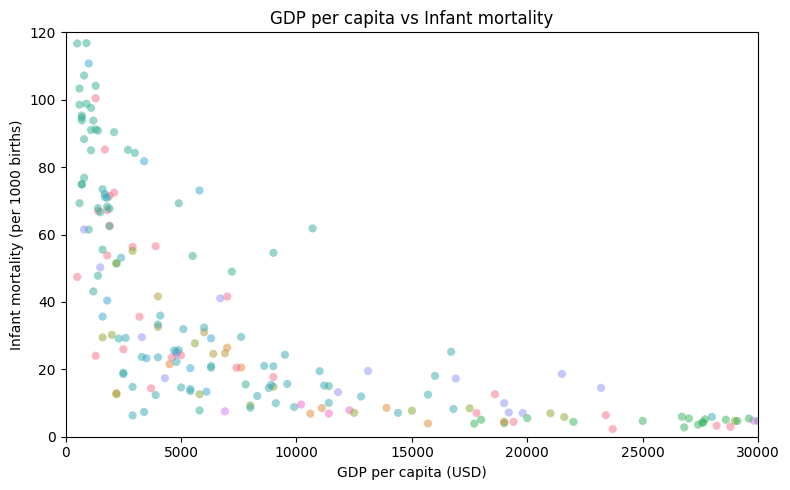

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_clean,
    x="GDP ($ per capita)",
    y="Infant mortality (per 1000 births)",
    hue="Region",
    alpha=0.5,
    s=35,
    edgecolor="none",
    legend=False   # or use legend='brief'
)
plt.title("GDP per capita vs Infant mortality")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Infant mortality (per 1000 births)")
plt.xlim(0, 30000)   # optional: clip extreme values
plt.ylim(0, 120)
plt.tight_layout()
plt.show()



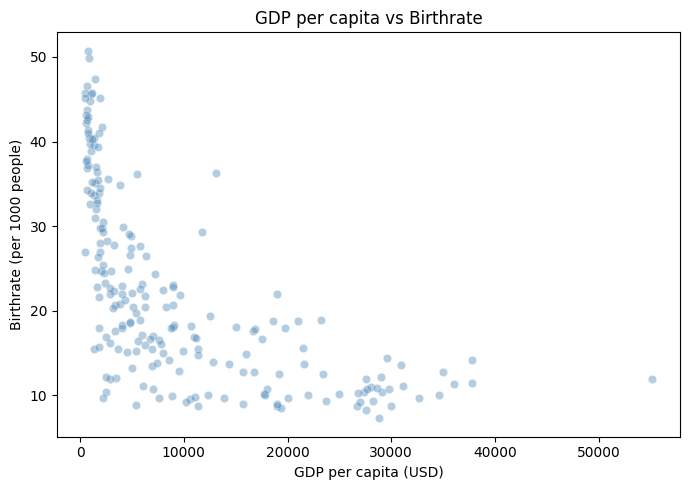

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_clean,
    x="GDP ($ per capita)",
    y="Birthrate",
    color="steelblue",
    alpha=0.4
)
plt.title("GDP per capita vs Birthrate")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Birthrate (per 1000 people)")
plt.tight_layout()
plt.show()

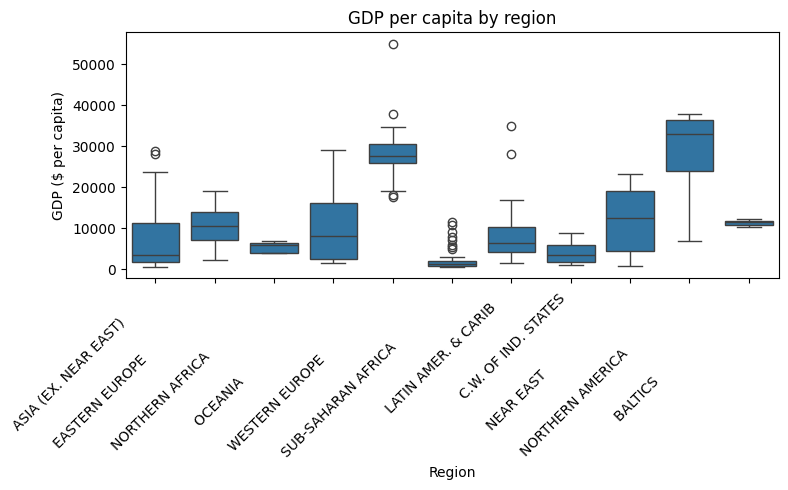

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x="Region", y="GDP ($ per capita)")
plt.xticks(rotation=45, ha="right")
plt.title("GDP per capita by region")
plt.tight_layout()
plt.show()

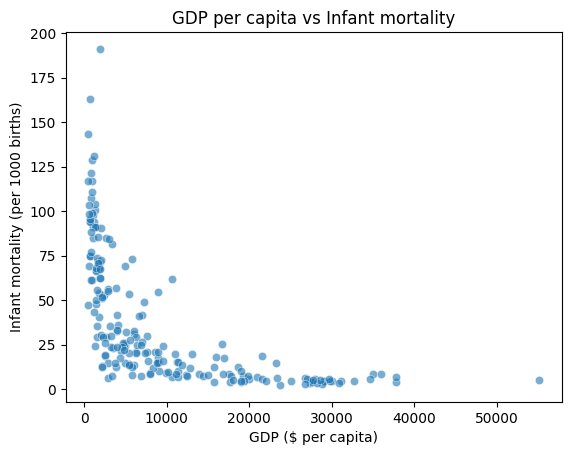

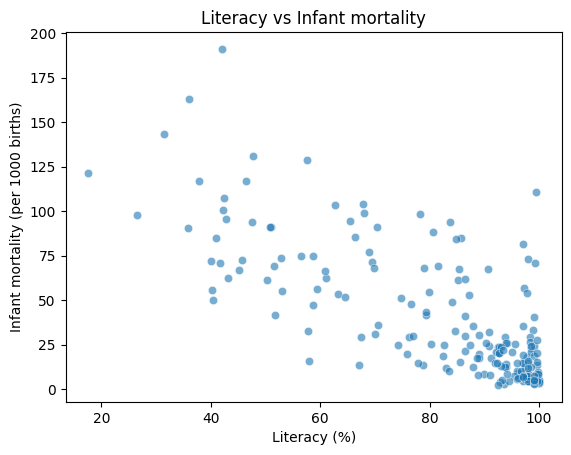

,GDP ($ per capita),Literacy (%),Infant mortality (per 1000 births)
GDP ($ per capita),1.000000,0.514398,-0.607174
Literacy (%),0.514398,1.000000,-0.765536
Infant mortality (per 1000 births),-0.607174,-0.765536,1.000000


In [11]:
sns.scatterplot(
    data=df_clean,
    x="GDP ($ per capita)",
    y="Infant mortality (per 1000 births)",
    alpha=0.6
)
plt.title("GDP per capita vs Infant mortality")
plt.show()

sns.scatterplot(
    data=df_clean,
    x="Literacy (%)",
    y="Infant mortality (per 1000 births)",
    alpha=0.6
)
plt.title("Literacy vs Infant mortality")
plt.show()

df_clean[["GDP ($ per capita)",
          "Literacy (%)",
          "Infant mortality (per 1000 births)"]].corr()


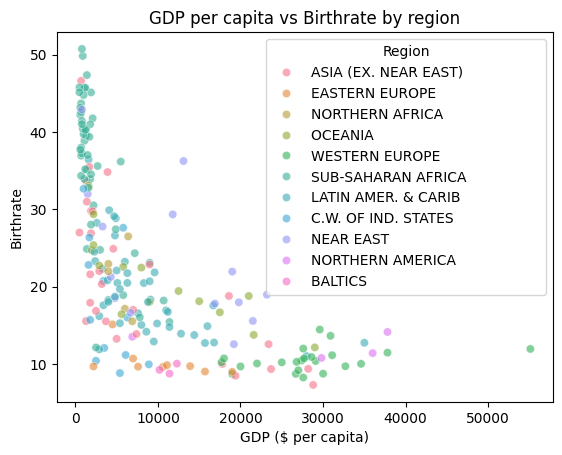

In [12]:
sns.scatterplot(
    data=df_clean,
    x="GDP ($ per capita)",
    y="Birthrate",
    hue="Region",
    alpha=0.6
)
plt.title("GDP per capita vs Birthrate by region")
plt.show()


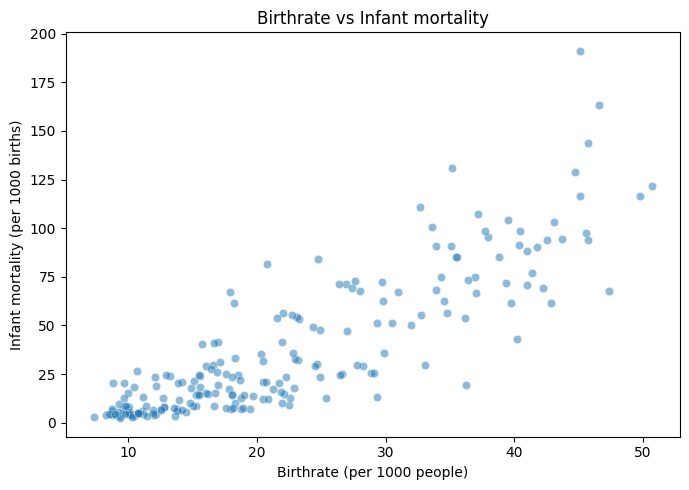

In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_clean,
    x="Birthrate",
    y="Infant mortality (per 1000 births)",
    alpha=0.5
)
plt.title("Birthrate vs Infant mortality")
plt.xlabel("Birthrate (per 1000 people)")
plt.ylabel("Infant mortality (per 1000 births)")
plt.tight_layout()
plt.show()


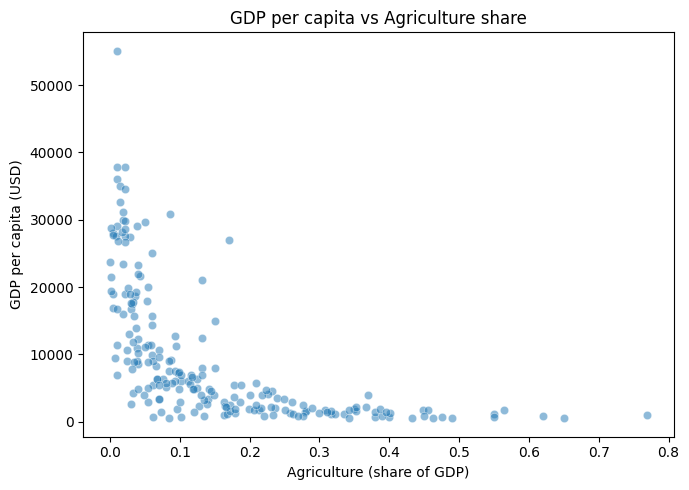

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_clean,
    x="Agriculture",
    y="GDP ($ per capita)",
    alpha=0.5
)
plt.title("GDP per capita vs Agriculture share")
plt.xlabel("Agriculture (share of GDP)")
plt.ylabel("GDP per capita (USD)")
plt.tight_layout()
plt.show()


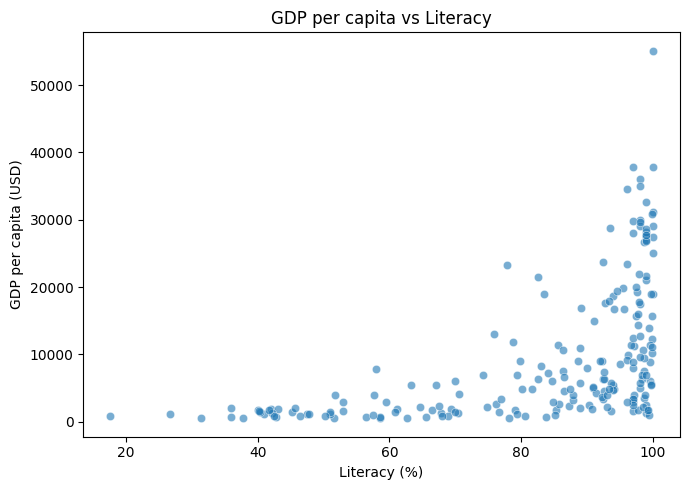

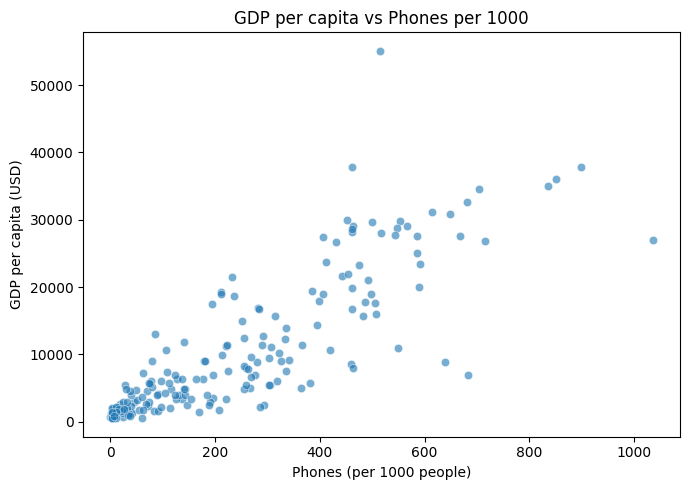

In [15]:
# GDP vs Literacy
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_clean,
    x="Literacy (%)",
    y="GDP ($ per capita)",
    alpha=0.6
)
plt.title("GDP per capita vs Literacy")
plt.xlabel("Literacy (%)")
plt.ylabel("GDP per capita (USD)")
plt.tight_layout()
plt.show()

# GDP vs Phones per 1000
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_clean,
    x="Phones (per 1000)",
    y="GDP ($ per capita)",
    alpha=0.6
)
plt.title("GDP per capita vs Phones per 1000")
plt.xlabel("Phones (per 1000 people)")
plt.ylabel("GDP per capita (USD)")
plt.tight_layout()
plt.show()


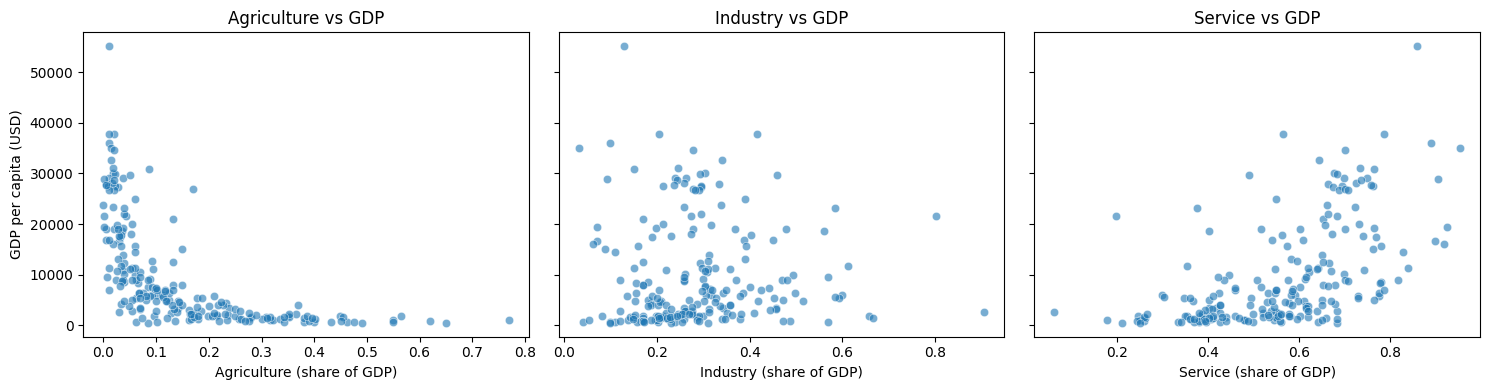

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True)

sns.scatterplot(
    data=df_clean,
    x="Agriculture",
    y="GDP ($ per capita)",
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title("Agriculture vs GDP")
axes[0].set_xlabel("Agriculture (share of GDP)")
axes[0].set_ylabel("GDP per capita (USD)")

sns.scatterplot(
    data=df_clean,
    x="Industry",
    y="GDP ($ per capita)",
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title("Industry vs GDP")
axes[1].set_xlabel("Industry (share of GDP)")
axes[1].set_ylabel("")

sns.scatterplot(
    data=df_clean,
    x="Service",
    y="GDP ($ per capita)",
    alpha=0.6,
    ax=axes[2]
)
axes[2].set_title("Service vs GDP")
axes[2].set_xlabel("Service (share of GDP)")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()


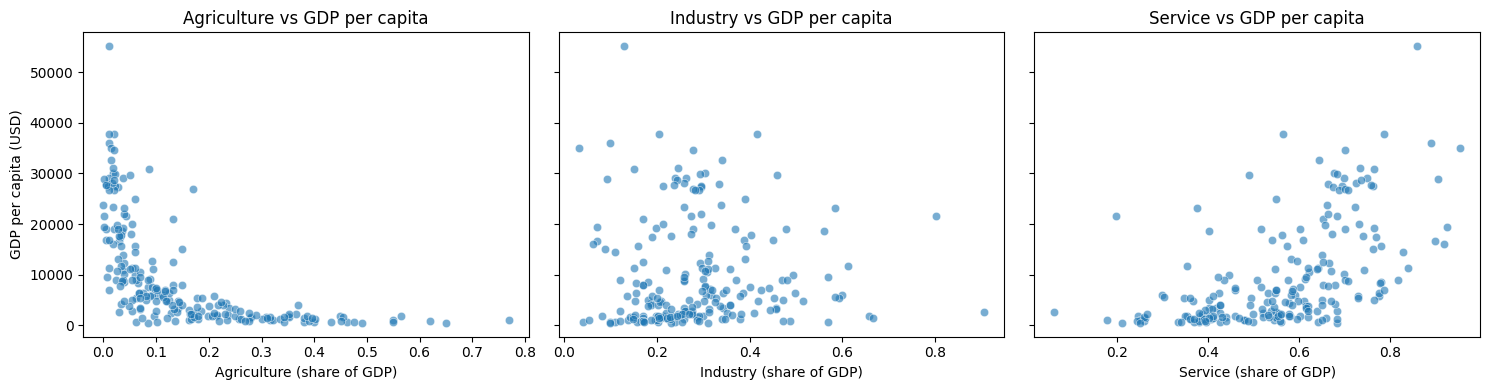

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15,4), sharey=True)

sns.scatterplot(
    data=df_clean, x="Agriculture", y="GDP ($ per capita)",
    alpha=0.6, ax=axes[0]
)
axes[0].set_title("Agriculture vs GDP per capita")
axes[0].set_xlabel("Agriculture (share of GDP)")
axes[0].set_ylabel("GDP per capita (USD)")

sns.scatterplot(
    data=df_clean, x="Industry", y="GDP ($ per capita)",
    alpha=0.6, ax=axes[1]
)
axes[1].set_title("Industry vs GDP per capita")
axes[1].set_xlabel("Industry (share of GDP)")
axes[1].set_ylabel("")

sns.scatterplot(
    data=df_clean, x="Service", y="GDP ($ per capita)",
    alpha=0.6, ax=axes[2]
)
axes[2].set_title("Service vs GDP per capita")
axes[2].set_xlabel("Service (share of GDP)")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()


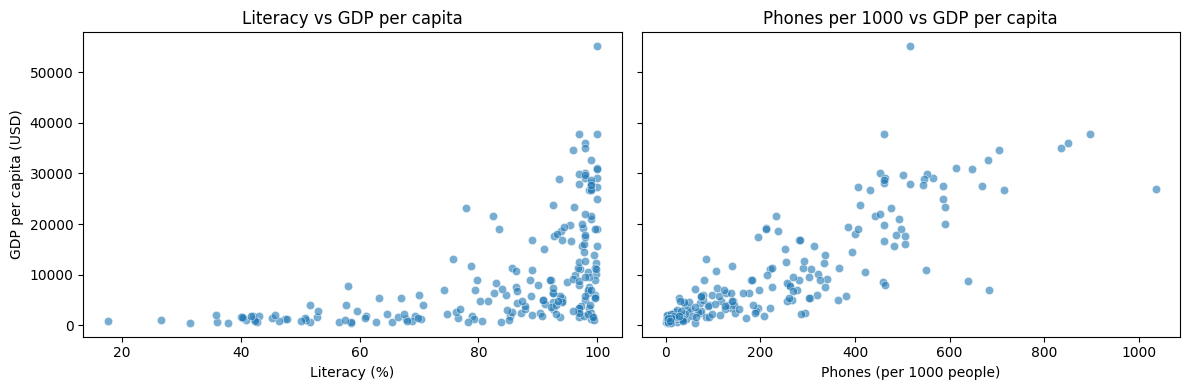

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)
sns.scatterplot(
    data=df_clean,
    x="Literacy (%)",
    y="GDP ($ per capita)",
    alpha=0.6,
    ax=axes[0]
)
axes[0].set_title("Literacy vs GDP per capita")
axes[0].set_xlabel("Literacy (%)")
axes[0].set_ylabel("GDP per capita (USD)")

sns.scatterplot(
    data=df_clean,
    x="Phones (per 1000)",
    y="GDP ($ per capita)",
    alpha=0.6,
    ax=axes[1]
)
axes[1].set_title("Phones per 1000 vs GDP per capita")
axes[1].set_xlabel("Phones (per 1000 people)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


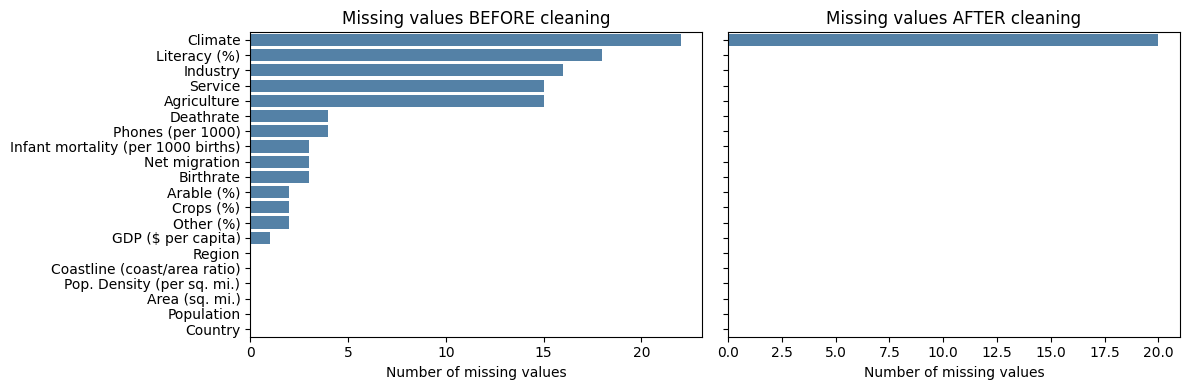

In [19]:
# Missing counts before and after
missing_before = df.isna().sum().sort_values(ascending=False)
missing_after  = df_clean.isna().sum().reindex(missing_before.index)

fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)

# BEFORE cleaning
sns.barplot(
    ax=axes[0],
    x=missing_before.values,
    y=missing_before.index,
    color="steelblue"
)
axes[0].set_title("Missing values BEFORE cleaning")
axes[0].set_xlabel("Number of missing values")
axes[0].set_ylabel("")  # y‑labels shown only once (shared)

# AFTER cleaning
sns.barplot(
    ax=axes[1],
    x=missing_after.values,
    y=missing_before.index,   # same order as 'before'
    color="steelblue"
)
axes[1].set_title("Missing values AFTER cleaning")
axes[1].set_xlabel("Number of missing values")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


# Modeling

In [20]:
features = [
    "GDP ($ per capita)",
    "Literacy (%)",
    "Infant mortality (per 1000 births)",
    "Phones (per 1000)",
    "Birthrate",
    "Deathrate"
]

X = df_clean[features].copy()
print("Shape before dropna:", X.shape)
X = X.dropna()
print("Shape after dropna:", X.shape)
X.head()

Shape before dropna: (207, 6)
Shape after dropna: (207, 6)


,GDP ($ per capita),Literacy (%),Infant mortality (per 1000 births),Phones (per 1000),Birthrate,Deathrate
0,700.0,36.0,163.07,3.2,46.60,20.34
1,4500.0,86.5,21.52,71.2,15.11,5.22
2,6000.0,70.0,31.00,78.1,17.14,4.61
3,8000.0,97.0,9.27,259.5,22.46,3.27
4,19000.0,100.0,4.05,497.2,8.71,6.25


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features, index=X.index)

X_scaled_df.head()

,GDP ($ per capita),Literacy (%),Infant mortality (per 1000 births),Phones (per 1000),Birthrate,Deathrate
0,-0.882634,-2.392472,3.496337,-1.020131,2.174351,2.144124
1,-0.508379,0.181549,-0.429337,-0.707002,-0.638512,-0.813222
2,-0.360647,-0.659468,-0.166424,-0.675229,-0.457181,-0.932533
3,-0.163671,0.716742,-0.769072,0.160088,0.018031,-1.194626
4,0.919698,0.869654,-0.913841,1.254657,-1.210196,-0.611763


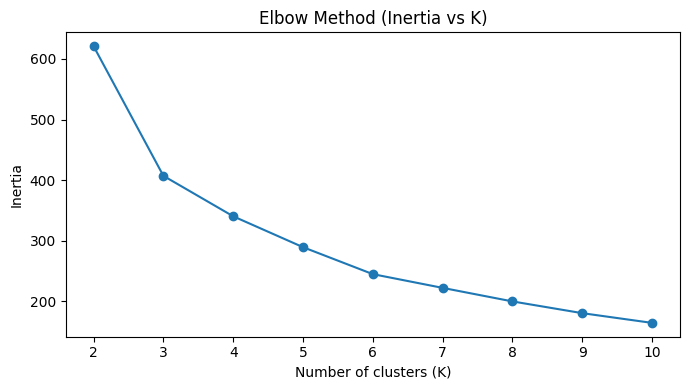

In [22]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(list(K_range), inertias, marker="o")
plt.title("Elbow Method (Inertia vs K)")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()

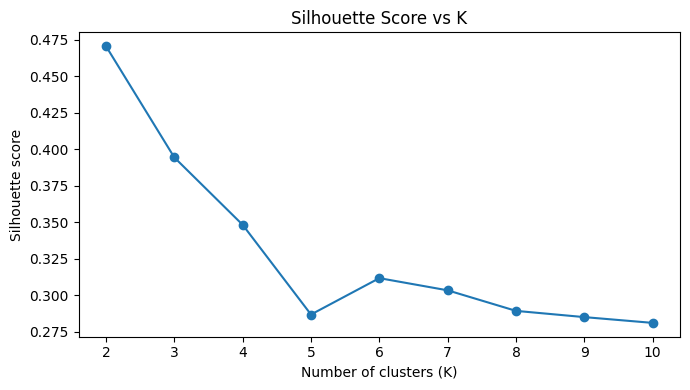

Best K by silhouette: 2


In [23]:
sil_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

plt.figure(figsize=(7,4))
plt.plot(list(K_range), sil_scores, marker="o")
plt.title("Silhouette Score vs K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette score")
plt.tight_layout()
plt.show()

best_k = list(K_range)[int(np.argmax(sil_scores))]
print("Best K by silhouette:", best_k)

In [24]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)
df_model = df_clean.loc[X.index].copy()
df_model["cluster"] = cluster_labels

df_model[["Country", "Region", "cluster"]].head()


,Country,Region,cluster
0,Afghanistan,ASIA (EX. NEAR EAST),1
1,Albania,EASTERN EUROPE,2
2,Algeria,NORTHERN AFRICA,2
3,American Samoa,OCEANIA,2
4,Andorra,WESTERN EUROPE,0


In [25]:
df_model["cluster"].value_counts().sort_index()

cluster
0    53
1    56
2    98
Name: count, dtype: int64

In [26]:
cluster_summary = df_model.groupby("cluster")[features].mean()
cluster_counts = df_model.groupby("cluster").size().rename("count")

summary = cluster_summary.join(cluster_counts)
summary



,GDP ($ per capita),Literacy (%),Infant mortality (per 1000 births),Phones (per 1000),Birthrate,Deathrate,count
cluster,,,,,,,
0,23990.566038,97.307547,6.714340,526.562264,11.705283,8.276604,53
1,1867.857143,58.642857,86.513036,16.687500,36.955714,15.154286,56
2,6366.326531,89.050000,25.087551,180.385714,19.566684,6.672398,98


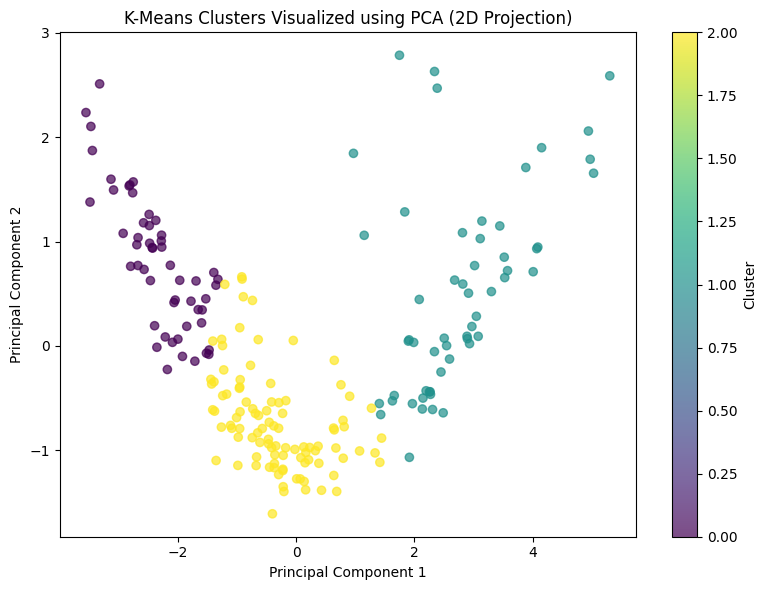

Explained variance ratio: [0.68154025 0.15869112]
Total explained variance: 0.8402313676203365


In [27]:
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=df_model["cluster"], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters Visualized using PCA (2D Projection)")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())

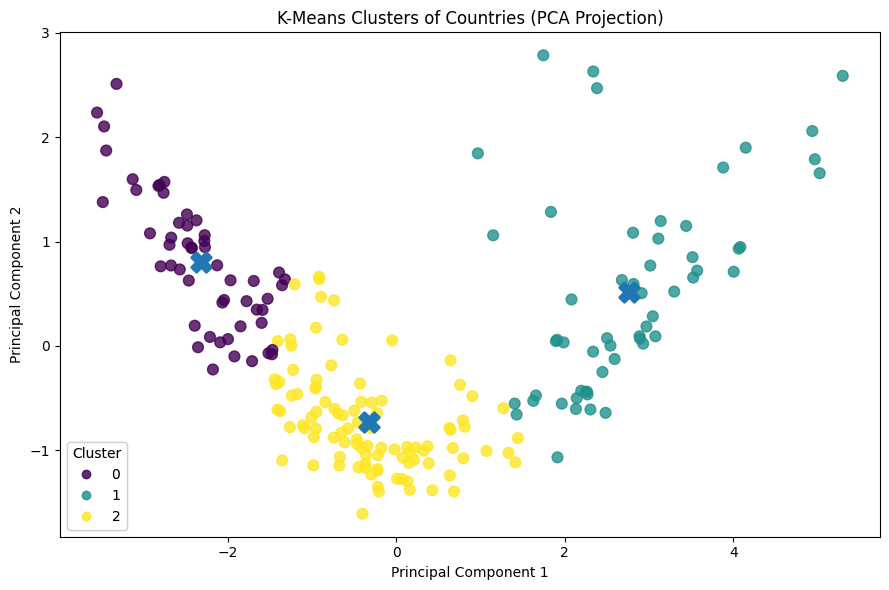

Explained variance ratio: [0.68154025 0.15869112]
Total explained variance: 0.8402313676203365


In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# PCA to 2D
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)

# Project cluster centers to PCA space
centers_2d = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(9, 6))

scatter = plt.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=df_model["cluster"],
    alpha=0.8,
    s=60
)

# Plot cluster centers
plt.scatter(
    centers_2d[:, 0],
    centers_2d[:, 1],
    marker="X",
    s=200,
    linewidths=2
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters of Countries (PCA Projection)")

# Create legend
legend1 = plt.legend(*scatter.legend_elements(), title="Cluster")
plt.gca().add_artist(legend1)

plt.tight_layout()
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total explained variance:", pca.explained_variance_ratio_.sum())


In [29]:
cluster_names = {
    0: "High development",
    1: "Low development",
    2: "Medium development"
}

df_model["cluster_name"] = df_model["cluster"].map(cluster_names)
df_model[["Country", "cluster", "cluster_name"]].head()


,Country,cluster,cluster_name
0,Afghanistan,1,Low development
1,Albania,2,Medium development
2,Algeria,2,Medium development
3,American Samoa,2,Medium development
4,Andorra,0,High development


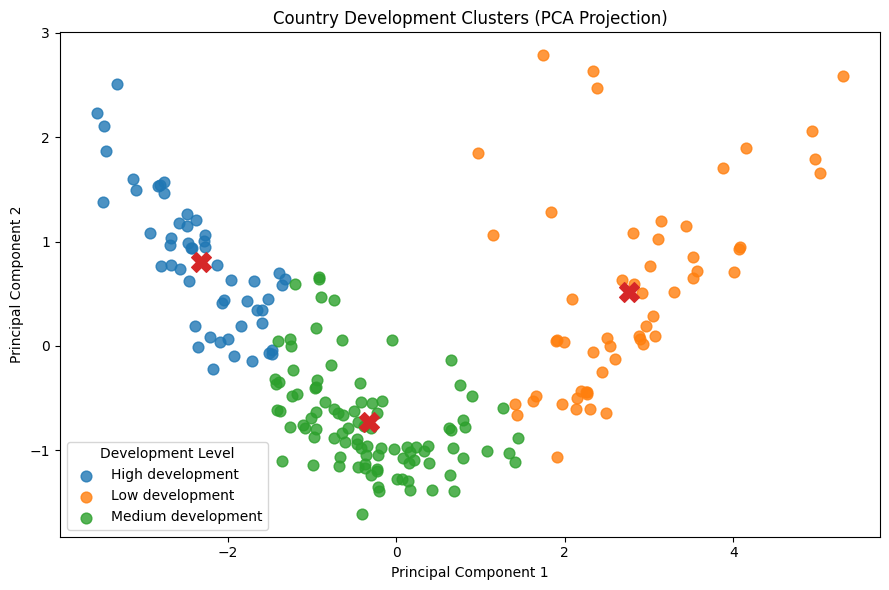

In [30]:
plt.figure(figsize=(9, 6))

for cluster_id, name in cluster_names.items():
    idx = df_model["cluster"] == cluster_id
    plt.scatter(
        X_2d[idx, 0],
        X_2d[idx, 1],
        label=name,
        alpha=0.8,
        s=60
    )

# Plot cluster centers
plt.scatter(
    centers_2d[:, 0],
    centers_2d[:, 1],
    marker="X",
    s=200
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Country Development Clusters (PCA Projection)")
plt.legend(title="Development Level")
plt.tight_layout()
plt.show()


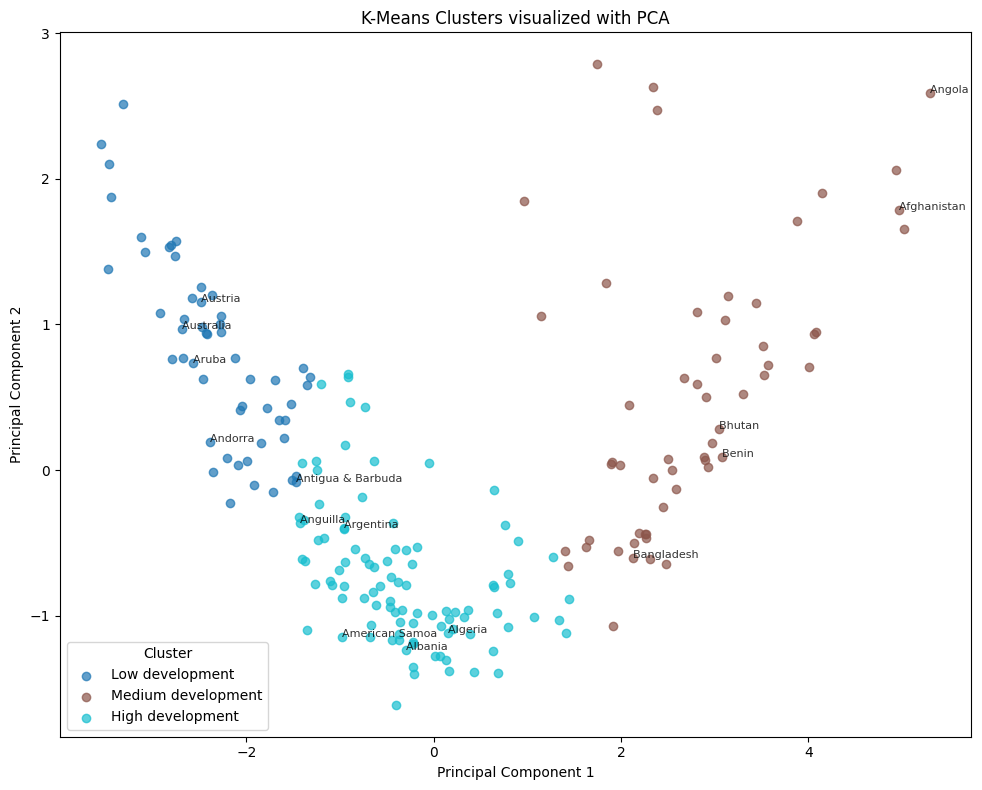

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Optional: map numeric labels to semantic names
cluster_name_map = {
    0: "Low development",
    1: "Medium development",
    2: "High development"
}

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))

# Create a scatter for each cluster so legend is clear
clusters = sorted(df_model["cluster"].unique())
colors = plt.cm.tab10(np.linspace(0, 1, len(clusters)))

for c, col in zip(clusters, colors):
    mask = df_model["cluster"] == c
    plt.scatter(
        X_2d[mask, 0],
        X_2d[mask, 1],
        c=[col],
        alpha=0.7,
        label=cluster_name_map.get(c, f"Cluster {c}")
    )

# (Optional) annotate a few countries per cluster
for c in clusters:
    mask = df_model["cluster"] == c
    # pick at most 5 countries per cluster to avoid clutter
    idx = np.where(mask)[0][:5]
    for i in idx:
        plt.annotate(
            df_model.loc[df_model.index[i], "Country"],
            (X_2d[i, 0], X_2d[i, 1]),
            fontsize=8,
            alpha=0.8
        )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters visualized with PCA")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


In [32]:
# Dashboard export (from existing notebook results)

df_dash = df_model.copy()

# add PCA coordinates
df_dash["pc1"] = X_2d[:, 0]
df_dash["pc2"] = X_2d[:, 1]

# use your readable cluster names
# you already have cluster_names and df_model["cluster_name"]
# we'll keep one consistent label column:
df_dash["cluster_label"] = df_dash["cluster"].map(cluster_names)

# pick the columns we need for Dash
keep_cols = ["Country", "Region", "cluster_label", "pc1", "pc2"] + features
df_dash = df_dash[keep_cols]

df_dash.to_csv("countries_dashboard.csv", index=False)
print("Saved countries_dashboard.csv", df_dash.shape)

df_dash.head()


Saved countries_dashboard.csv (207, 11)


,Country,Region,cluster_label,pc1,pc2,GDP ($ per capita),Literacy (%),Infant mortality (per 1000 births),Phones (per 1000),Birthrate,Deathrate
0,Afghanistan,ASIA (EX. NEAR EAST),Low development,4.968755,1.788978,700.0,36.0,163.07,3.2,46.60,20.34
1,Albania,EASTERN EUROPE,Medium development,-0.295840,-1.235152,4500.0,86.5,21.52,71.2,15.11,5.22
2,Algeria,NORTHERN AFRICA,Medium development,0.150523,-1.121601,6000.0,70.0,31.00,78.1,17.14,4.61
3,American Samoa,OCEANIA,Medium development,-0.984831,-1.147019,8000.0,97.0,9.27,259.5,22.46,3.27
4,Andorra,WESTERN EUROPE,High development,-2.392124,0.192495,19000.0,100.0,4.05,497.2,8.71,6.25
